In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'btc_price_data.csv')
df.head()


Date     btc_open     btc_high      btc_low    btc_close  \
0  17-04-2022  40417.77734  40570.72656  39620.89453  39716.95313   
1  18-04-2022  39721.20313  40986.32031  38696.19141  40826.21484   
2  19-04-2022  40828.17578  41672.96094  40618.63281  41502.75000   
3  20-04-2022  41501.74609  42126.30078  40961.09766  41374.37891   
4  21-04-2022  41371.51563  42893.58203  40063.82813  40527.36328   

   btc_adj_close    btc_volume  
0    39716.95313  1.908763e+10  
1    40826.21484  3.370518e+10  
2    41502.75000  2.530321e+10  
3    41374.37891  2.781953e+10  
4    40527.36328  3.537279e+10

In [ ]:
df.describe()

btc_open      btc_high       btc_low     btc_close  btc_adj_close  \
count    366.000000    366.000000    366.000000    366.000000     366.000000   
mean   23094.502765  23531.977737  22614.373373  23064.700068   23064.700068   
std     5750.766620   5872.429557   5559.831246   5689.340889    5689.340889   
min    15782.300780  16253.047850  15599.046880  15787.284180   15787.284180   
25%    19326.514653  19636.722165  19025.690427  19325.394040   19325.394040   
50%    21528.958985  21803.812500  20959.862305  21531.104490   21531.104490   
75%    24738.201170  25228.042965  24302.009767  24719.875000   24719.875000   
max    41501.746090  42893.582030  40961.097660  41502.750000   41502.750000   

         btc_volume  
count  3.660000e+02  
mean   2.910441e+10  
std    1.294824e+10  
min    7.714767e+09  
25%    2.050629e+10  
50%    2.725619e+10  
75%    3.410379e+10  
max    1.190000e+11

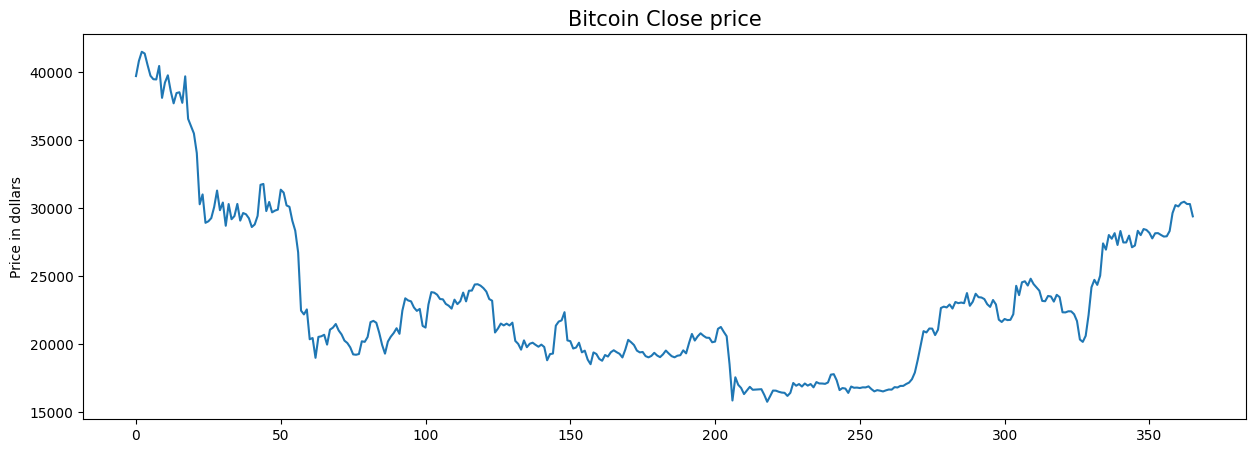

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['btc_close'])
plt.title('Bitcoin Close price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()


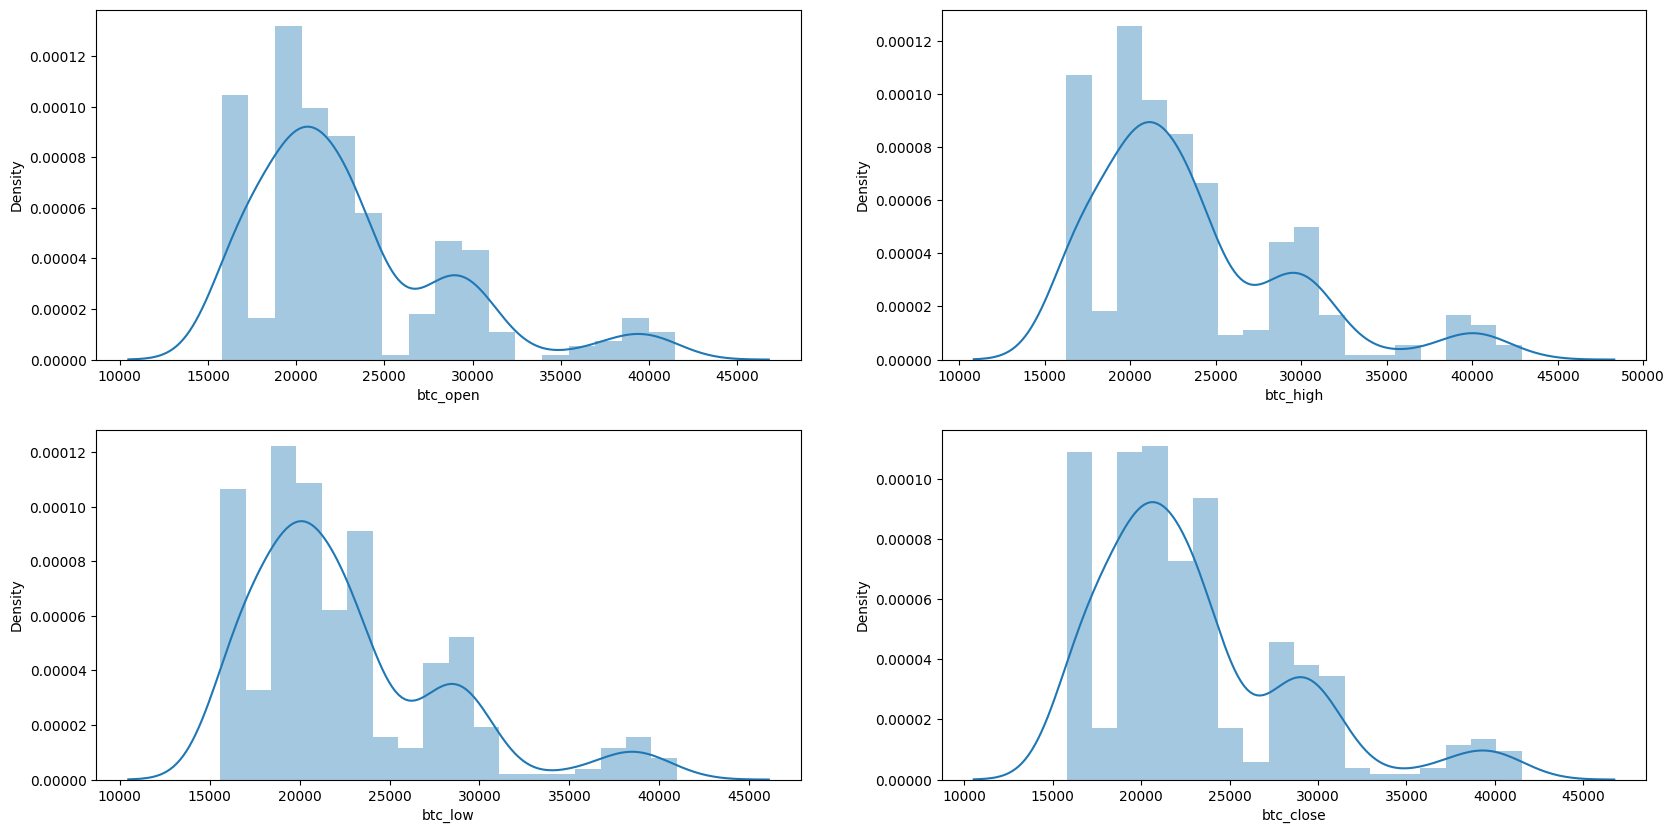

In [ ]:
features = ['btc_open', 'btc_high', 'btc_low', 'btc_close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()


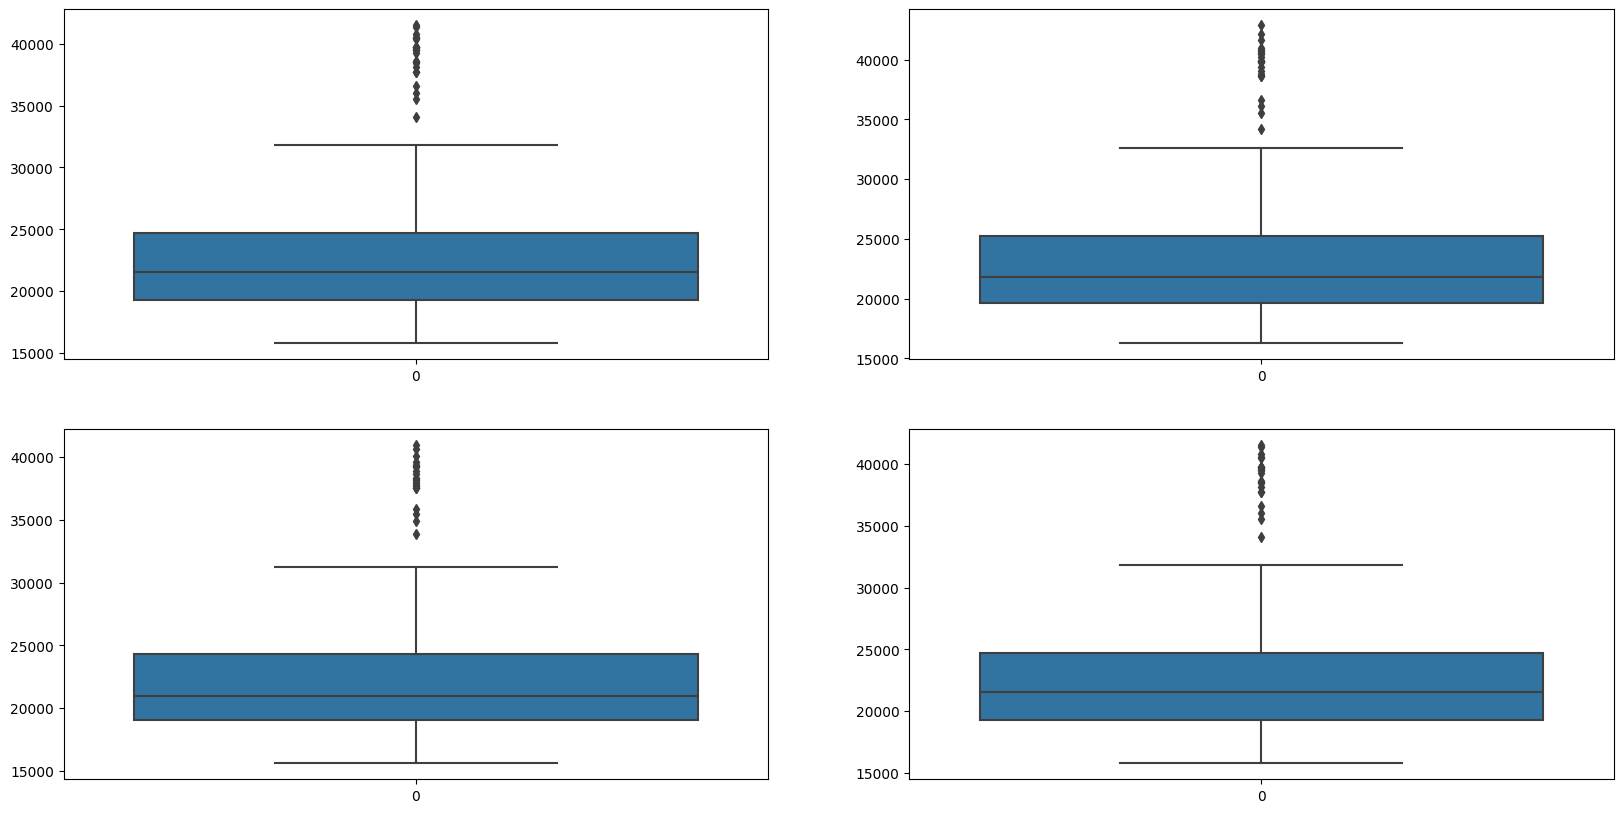

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()

Date     btc_open     btc_high      btc_low    btc_close  \
0  17-04-2022  40417.77734  40570.72656  39620.89453  39716.95313   
1  18-04-2022  39721.20313  40986.32031  38696.19141  40826.21484   
2  19-04-2022  40828.17578  41672.96094  40618.63281  41502.75000   
3  20-04-2022  41501.74609  42126.30078  40961.09766  41374.37891   
4  21-04-2022  41371.51563  42893.58203  40063.82813  40527.36328   

   btc_adj_close    btc_volume  year  month   day  
0    39716.95313  1.908763e+10    17      4  2022  
1    40826.21484  3.370518e+10    18      4  2022  
2    41502.75000  2.530321e+10    19      4  2022  
3    41374.37891  2.781953e+10    20      4  2022  
4    40527.36328  3.537279e+10    21      4  2022

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

Date     btc_open     btc_high      btc_low    btc_close  \
0  17-04-2022  40417.77734  40570.72656  39620.89453  39716.95313   
1  18-04-2022  39721.20313  40986.32031  38696.19141  40826.21484   
2  19-04-2022  40828.17578  41672.96094  40618.63281  41502.75000   
3  20-04-2022  41501.74609  42126.30078  40961.09766  41374.37891   
4  21-04-2022  41371.51563  42893.58203  40063.82813  40527.36328   

   btc_adj_close    btc_volume  year  month   day  is_quarter_end  
0    39716.95313  1.908763e+10    17      4  2022               0  
1    40826.21484  3.370518e+10    18      4  2022               0  
2    41502.75000  2.530321e+10    19      4  2022               0  
3    41374.37891  2.781953e+10    20      4  2022               0  
4    40527.36328  3.537279e+10    21      4  2022               0

In [ ]:
df['open-close'] = df['btc_open'] - df['btc_close']
df['low-high'] = df['btc_low'] - df['btc_high']
df['target'] = np.where(df['btc_close'].shift(-1) > df['btc_close'], 1, 0)

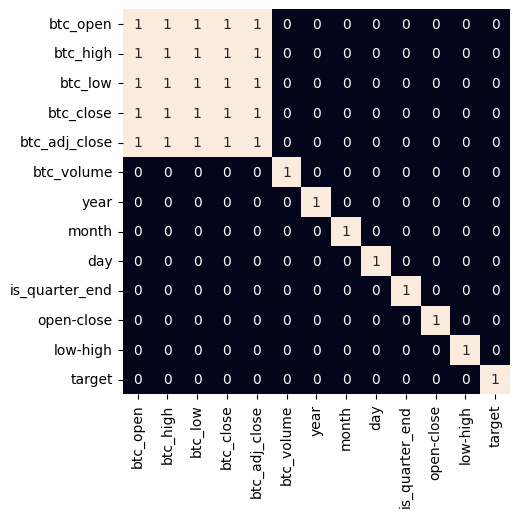

In [ ]:
plt.figure(figsize=(5,5))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

Date     btc_open     btc_high      btc_low    btc_close  \
0  17-04-2022  40417.77734  40570.72656  39620.89453  39716.95313   
1  18-04-2022  39721.20313  40986.32031  38696.19141  40826.21484   
2  19-04-2022  40828.17578  41672.96094  40618.63281  41502.75000   
3  20-04-2022  41501.74609  42126.30078  40961.09766  41374.37891   
4  21-04-2022  41371.51563  42893.58203  40063.82813  40527.36328   

   btc_adj_close    btc_volume  year  month   day  is_quarter_end  open-close  \
0    39716.95313  1.908763e+10    17      4  2022               0   700.82421   
1    40826.21484  3.370518e+10    18      4  2022               0 -1105.01171   
2    41502.75000  2.530321e+10    19      4  2022               0  -674.57422   
3    41374.37891  2.781953e+10    20      4  2022               0   127.36718   
4    40527.36328  3.537279e+10    21      4  2022               0   844.15235   

     low-high  target  
0  -949.83203       1  
1 -2290.12890       1  
2 -1054.32813       0  
3 -1165.20312       0  
4 -2829.75390       0

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target,train_size=0.7, test_size=0.3,shuffle=True, random_state=None)
print(X_train.shape, X_valid.shape)


(256, 3) (110, 3)


In [ ]:
models= [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5341068702290076
Validation Accuracy :  0.40828804347826086

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.44018320610687023
Validation Accuracy :  0.5460258152173914

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accu